In [6]:
import os
import matplotlib.pyplot as plt
from OA_utils.OAPreprocessingScripts import *
from OA_utils.OpenSimScripts import *
from OA_utils.data_utils import interp_segments, ad2float

Create lists of filenames for all raw data

In [10]:
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
subjects = [f'OA{i}' for i in range(1, 26)]
bad_subjects = ['OA3', 'OA6', 'OA15', 'OA16', 'OA21']
for bs in bad_subjects:
    subjects.remove(bs)
speeds = ['80', '100', '120']
n_trials = 5
subject_trials = {}
for subj in subjects:
    subj_dir = os.path.join(root_dir, subj, 'Walking/Files_W_HJCs/')
    output_dir = os.path.join(root_dir, 'transformed/')
    # Initialize nested dict
    subject_trials[subj] = {
        'static': {
            'input': os.path.join(subj_dir, f'{subj}_walk_static1.trc'),
            'output': os.path.join(output_dir, f'{subj}_walk_static1_transformed.trc')
        },
        'tracking': [],
        'forces': [],
        
    }
    # Populate tracking and force trial lists
    for spd in speeds:
        for i in range(1, n_trials + 1):
            trial_name = f'{subj}_{spd}_{i}'

            tracking_in = os.path.join(subj_dir, f'{trial_name}.trc')
            tracking_out = os.path.join(output_dir, f'{trial_name}_transformed.trc')
            force_in = os.path.join(subj_dir, f'{trial_name}.forces')
            force_out = os.path.join(output_dir, f'{trial_name}_transformed.mot')

            subject_trials[subj]['tracking'].append({'input': tracking_in, 'output': tracking_out})
            subject_trials[subj]['forces'].append({'input': force_in, 'output': force_out})

In [11]:
print(subject_trials['OA1'])

{'static': {'input': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA1/Walking/Files_W_HJCs/OA1_walk_static1.trc', 'output': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/OA1_walk_static1_transformed.trc'}, 'tracking': [{'input': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA1/Walking/Files_W_HJCs/OA1_80_1.trc', 'output': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/OA1_80_1_transformed.trc'}, {'input': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA1/Walking/Files_W_HJCs/OA1_80_2.trc', 'output': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/OA1_80_2_transformed.trc'}, {'input': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA1/Walking/Files_W_HJCs/OA1_80_3.trc', 'output': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/OA1_80_3_transformed.trc'}, {'input': '/Users/briankeller/De

Preprocess all tracking and grf data

In [12]:
all_segs = {}
for subj, data in subject_trials.items():
    process_hjc_trc(input_path=data['static']['input'], 
                    output_path=data['static']['output'], 
                    markers_to_drop=[])
    for trc, forces in zip(data['tracking'], data['forces']):
        trial_segs = preprocess_trc_grf(trc_ip=trc['input'], 
                           trc_op=trc['output'],
                           markers_to_drop=[], 
                           grf_ip=forces['input'], 
                           grf_op=forces['output'])
        all_segs.update(trial_segs)
print(all_segs)

{'OA1_80_1': {'left': [(1.2885, 2.0735)], 'right': [(0.6945, 1.475), (1.886, 2.696)]}, 'OA1_80_2': {'left': [(1.207, 2.011)], 'right': [(0.6065, 1.4145), (1.824, 2.6345)]}, 'OA1_80_3': {'left': [(1.151, 1.9685)], 'right': [(0.543, 1.357), (1.778, 2.577)]}, 'OA1_80_4': {'left': [(1.232, 2.0545)], 'right': [(0.624, 1.433), (1.8555, 2.689)]}, 'OA1_80_5': {'left': [(1.0405, 1.837)], 'right': [(0.4395, 1.2235), (1.652, 2.4615)]}, 'OA1_100_1': {'left': [(0.912, 1.6125)], 'right': [(0.37, 1.072), (1.4565, 2.1605)]}, 'OA1_100_2': {'left': [(1.0515, 1.741)], 'right': [(0.5325, 1.214), (1.5905, 2.278)]}, 'OA1_100_3': {'left': [(0.978, 1.6435)], 'right': [(0.476, 1.1395), (1.502, 2.178)]}, 'OA1_100_4': {'left': [(0.551, 1.1595), (1.5375, 2.1985)], 'right': [(1.0135, 1.698)]}, 'OA1_100_5': {'left': [(0.8995, 1.5655)], 'right': [(0.385, 1.061), (1.418, 2.1145)]}, 'OA1_120_1': {'left': [(0.9025, 1.513)], 'right': [(0.409, 1.0285)]}, 'OA1_120_2': {'left': [(0.7965, 1.4055)], 'right': [(0.347, 0.9285)

Scale Models for each subject

In [5]:
subj_masses = [63.5026, 61.68824, 68.0385, 68.0385, 59.87388, 76.65671, 57.15234, 71.66722,
               84.36774, 67.13132, 52.61644, 70.76004, 75.29594, 69.39927, 83.00697, 47.62695,
              61.68824, 84.82133, 74.38876, 83.91415]
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
for subj, data in subject_trials.items():
    scale_generic(root_dir= root_dir, mass=subj_masses[i], static_pose_filename=data['static']['output'])

[info] Processing subject OA1_scaled...
[info] Step 1: Loading generic model
[info] Updating Model file from 40000 to latest format...
[info] Loaded model RajagopalModifiedGeneric from file /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Models/RajagopalModified_generic.osim
[warning] Couldn't find file 'r_pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'r_femur.vtp'.
[warning] Couldn't find file 'r_tibia.vtp'.
[warning] Couldn't find file 'r_fibula.vtp'.
[warning] Couldn't find file 'r_patella.vtp'.
[warning] Couldn't find file 'r_talus.vtp'.
[warning] Couldn't find file 'r_foot.vtp'.
[warning] Couldn't find file 'r_bofoot.vtp'.
[warning] Couldn't find file 'l_femur.vtp'.
[warning] Couldn't find file 'l_tibia.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_patella.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp

Inverse Kinematics for each trial: causes memory overflow when running in notebook

In [6]:
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
for subj, data in subject_trials.items():
    model = osim.Model(f'Results/Scaling/{subj}_scaled.osim')
    for trc, in data['tracking']:
        inverse_kinmatics(root_dir= root_dir, tracking_data_filepath=trc['output'], model=model)

[info] Loaded model OA1_scaled from file Results/Scaling/OA1_scaled.osim
[warning] Couldn't find file 'r_pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'r_femur.vtp'.
[warning] Couldn't find file 'r_tibia.vtp'.
[warning] Couldn't find file 'r_fibula.vtp'.
[warning] Couldn't find file 'r_patella.vtp'.
[warning] Couldn't find file 'r_talus.vtp'.
[warning] Couldn't find file 'r_foot.vtp'.
[warning] Couldn't find file 'r_bofoot.vtp'.
[warning] Couldn't find file 'l_femur.vtp'.
[warning] Couldn't find file 'l_tibia.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_patella.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'.
[warning] Couldn't find file 'l_bofoot.vtp'.
[warning] Couldn't find file 'hat_spine.vtp'.
[warning] Couldn't find file 'hat_jaw.vtp'.
[warning] Couldn't find file 'hat_skull.vtp'.
[warning] Couldn't find file 'hat_ri

ValueError: too many values to unpack (expected 1)

Inverse Dynamics for each trial

In [32]:
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
os.chdir(root_dir)
for subj, data in subject_trials.items():
    model = osim.Model(f'Results/Scaling/{subj}_scaled.osim')
    for trc, forces in zip(data['tracking'], data['forces']):
        inverse_dynamics(root_dir=root_dir, force_data_filepath=forces['output'], tracking_data_filepath=trc['output'], model=model)

[info] Loaded model OA1_scaled from file Results/Scaling/OA1_scaled.osim
[warning] Couldn't find file 'r_pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'r_femur.vtp'.
[warning] Couldn't find file 'r_tibia.vtp'.
[warning] Couldn't find file 'r_fibula.vtp'.
[warning] Couldn't find file 'r_patella.vtp'.
[warning] Couldn't find file 'r_talus.vtp'.
[warning] Couldn't find file 'r_foot.vtp'.
[warning] Couldn't find file 'r_bofoot.vtp'.
[warning] Couldn't find file 'l_femur.vtp'.
[warning] Couldn't find file 'l_tibia.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_patella.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'.
[warning] Couldn't find file 'l_bofoot.vtp'.
[warning] Couldn't find file 'hat_spine.vtp'.
[warning] Couldn't find file 'hat_jaw.vtp'.
[warning] Couldn't find file 'hat_skull.vtp'.
[warning] Couldn't find file 'hat_ri

Segment data of interest

In [9]:
all_segs = {}
for subj, data in subject_trials.items():
    process_hjc_trc(input_path=data['static']['input'], 
                    output_path=data['static']['output'], 
                    markers_to_drop=[])
    for trc, forces in zip(data['tracking'], data['forces']):
        trial_segs = preprocess_trc_grf(trc_ip=trc['input'], 
                           trc_op=trc['output'],
                           markers_to_drop=[], 
                           grf_ip=forces['input'], 
                           grf_op=forces['output'])
        all_segs.update(trial_segs)
print(all_segs)

NameError: name 'subject_trials' is not defined

In [8]:
left = 0
right = 0
for trial, side in all_segs.items():
    left += len(side.get('left', []))
    right += len(side.get('right', []))
print(left)
print(right)

NameError: name 'all_segs' is not defined

In [657]:
#initialize arrays to store compiled segments
grf_x_segs = []
grf_y_segs = []
grf_z_segs = []

tibpost_segments = []
tibant_segments = []
edl_segments = []
ehl_segments = []
fdl_segments = []
fhl_segments = []
gaslat_segments = []
gasmed_segments = []
soleus_segments = []
perbrev_segments = []
perlong_segments = []
achilles_segments = []

problematic_segs = []

#loop thru subjects
for subject, subject_segs in all_segs.items():
    grf_path = os.path.join('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/grf_pickles', subject)
    grf_df = pd.read_pickle(grf_path)
    muscle_path = os.path.join(f'/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/{subject}/results_forces.sto')
    muscle_storage = osim.Storage(muscle_path)

    time = grf_df['time'].values
    muscle_time_col = osim.ArrayDouble()
    tibpost_r_col = osim.ArrayDouble()
    tibant_r_col = osim.ArrayDouble()
    edl_r_col = osim.ArrayDouble()
    ehl_r_col = osim.ArrayDouble()
    fdl_r_col = osim.ArrayDouble()
    fhl_r_col = osim.ArrayDouble()
    gaslat_r_col = osim.ArrayDouble()
    gasmed_r_col = osim.ArrayDouble()
    soleus_r_col = osim.ArrayDouble()
    perbrev_r_col = osim.ArrayDouble()
    perlong_r_col = osim.ArrayDouble()
        
    tibpost_l_col = osim.ArrayDouble()
    tibant_l_col = osim.ArrayDouble()
    edl_l_col = osim.ArrayDouble()
    ehl_l_col = osim.ArrayDouble()
    fdl_l_col = osim.ArrayDouble()
    fhl_l_col = osim.ArrayDouble()
    gaslat_l_col = osim.ArrayDouble()
    gasmed_l_col = osim.ArrayDouble()
    soleus_l_col = osim.ArrayDouble()
    perbrev_l_col = osim.ArrayDouble()
    perlong_l_col = osim.ArrayDouble()

    muscle_storage.getTimeColumn(muscle_time_col)
    muscle_storage.getDataColumn('tibpost_r', tibpost_r_col)
    muscle_storage.getDataColumn('tibant_r', tibant_r_col)
    muscle_storage.getDataColumn('edl_r', edl_r_col)
    muscle_storage.getDataColumn('ehl_r', ehl_r_col)
    muscle_storage.getDataColumn('fdl_r', fdl_r_col)
    muscle_storage.getDataColumn('fhl_r', fhl_r_col)
    muscle_storage.getDataColumn('gaslat_r', gaslat_r_col)
    muscle_storage.getDataColumn('gasmed_r', gasmed_r_col)
    muscle_storage.getDataColumn('soleus_r', soleus_r_col)
    muscle_storage.getDataColumn('perbrev_r', perbrev_r_col)
    muscle_storage.getDataColumn('perlong_r', perlong_r_col)
        
    muscle_storage.getDataColumn('tibpost_l', tibpost_l_col)
    muscle_storage.getDataColumn('tibant_l', tibant_l_col)
    muscle_storage.getDataColumn('edl_l', edl_l_col)
    muscle_storage.getDataColumn('ehl_l', ehl_l_col)
    muscle_storage.getDataColumn('fdl_l', fdl_l_col)
    muscle_storage.getDataColumn('fhl_l', fhl_l_col)
    muscle_storage.getDataColumn('gaslat_l', gaslat_l_col)
    muscle_storage.getDataColumn('gasmed_l', gasmed_l_col)
    muscle_storage.getDataColumn('soleus_l', soleus_l_col)
    muscle_storage.getDataColumn('perbrev_l', perbrev_l_col)
    muscle_storage.getDataColumn('perlong_l', perlong_l_col)
    muscle_time = ad2float(muscle_time_col)
    tibpost_r = ad2float(tibpost_r_col)
    tibant_r = ad2float(tibant_r_col)
    edl_r = ad2float(edl_r_col)
    ehl_r = ad2float(ehl_r_col)
    fdl_r = ad2float(fdl_r_col)
    fhl_r = ad2float(fhl_r_col)
    gaslat_r = ad2float(gaslat_r_col)
    gasmed_r = ad2float(gasmed_r_col)
    soleus_r = ad2float(soleus_r_col)
    perbrev_r = ad2float(perbrev_r_col)
    perlong_r = ad2float(perlong_r_col)
        
    tibpost_l = ad2float(tibpost_l_col)
    tibant_l = ad2float(tibant_l_col)
    edl_l = ad2float(edl_l_col)
    ehl_l = ad2float(ehl_l_col)
    fdl_l = ad2float(fdl_l_col)
    fhl_l = ad2float(fhl_l_col)
    gaslat_l = ad2float(gaslat_l_col)
    gasmed_l = ad2float(gasmed_l_col)
    soleus_l = ad2float(soleus_l_col)
    perbrev_l = ad2float(perbrev_l_col)
    perlong_l = ad2float(perlong_l_col)

    for side, seg_list in subject_segs.items():
        for (s, e) in seg_list:
            grf_mask = (time >= s) & (time <= e)
            muscle_mask = (muscle_time >= s) & (muscle_time <= e)
            if not muscle_mask.any() or not muscle_mask.any():
                continue
            if side == 'right':
                seg_y = grf_df.loc[grf_mask, 'ground_force_vy']
                seg_x = grf_df.loc[grf_mask, 'ground_force_vx']
                seg_z = grf_df.loc[grf_mask, 'ground_force_vz']
                seg_tibpost = tibpost_r[muscle_mask]
                seg_tibant = tibant_r[muscle_mask]
                seg_edl = edl_r[muscle_mask]
                seg_ehl = ehl_r[muscle_mask]
                seg_fdl = fdl_r[muscle_mask]
                seg_fhl = fhl_r[muscle_mask]
                seg_gaslat = gaslat_r[muscle_mask]
                seg_gasmed = gasmed_r[muscle_mask]
                seg_soleus = soleus_r[muscle_mask]
                seg_perbrev = perbrev_r[muscle_mask]
                seg_perlong = perlong_r[muscle_mask]
                seg_achilles = np.sum(np.array([seg_gaslat, seg_gasmed, seg_soleus]), axis=0)
            else:
                seg_x = grf_df.loc[grf_mask, '1_ground_force_vx']
                seg_y = grf_df.loc[grf_mask, '1_ground_force_vy']
                seg_z = -1 * grf_df.loc[grf_mask, '1_ground_force_vz']
                seg_tibpost = tibpost_l[muscle_mask]
                seg_tibant = tibant_l[muscle_mask]
                seg_edl = edl_l[muscle_mask]
                seg_ehl = ehl_l[muscle_mask]
                seg_fdl = fdl_l[muscle_mask]
                seg_fhl = fhl_l[muscle_mask]
                seg_gaslat = gaslat_l[muscle_mask]
                seg_gasmed = gasmed_l[muscle_mask]
                seg_soleus = soleus_l[muscle_mask]
                seg_perbrev = perbrev_l[muscle_mask]
                seg_perlong = perlong_l[muscle_mask]
                seg_achilles = np.sum(np.array([seg_gaslat, seg_gasmed, seg_soleus]), axis=0)

            #filter out missteps based on y grfs

            y_idx_25 = int(len(seg_y) * 0.25)
            y_idx_75 = int(len(seg_y) * 0.75)
            y_idx_10 = int(len(seg_y) * 0.1)
            y_idx_1 = int(len(seg_y) * 0.01)
            if len(seg_y) > 0 and seg_y.iloc[y_idx_25] < 450 or seg_y.iloc[y_idx_75] < 400 or seg_y.iloc[y_idx_1] > 300 or seg_y.iloc[y_idx_10] > 850:
                problematic_segs.append({
                    'subject': subject,
                    'side': side,
                    'file':grf_path,
                    'start_time': s,
                    'end_time':float(e)
                })
                continue

            # #filter on x
            # x_idx_20 = int(len(seg_x) * 0.2)
            # x_idx_80 = int(len(seg_x) * 0.8)
            # if seg_x.iloc[x_idx_20] > -10:
            #     problematic_segs.append({
            #         'subject': subject,
            #         'side': side,
            #         'file':grf_path,
            #         'start_time':float(s),
            #         'end_time':float(e)
            #     })
            #     continue
            # #filter on z
            # z_idx_10 = int(len(seg_z) * 0.1)
            # z_idx_75 = int(len(seg_z) * 0.75)
            # if seg_z.iloc[z_idx_10] < -10:
            #     problematic_segs.append({
            #         'subject': subject,
            #         'side': side,
            #         'file':grf_path,
            #         'start_time':float(s),
            #         'end_time':float(e)
            #     })
            #     continue
            
            # #filter on achilles force
            achilles_idx_75 = int(len(seg_achilles) * 0.75)
            achilles_idx_99 = int(len(seg_achilles) * 0.99)

            if len(seg_achilles) > 0 and seg_achilles[achilles_idx_75] > 4500 or seg_achilles[achilles_idx_75] < 1500 or seg_achilles[achilles_idx_99] > 1700:
                problematic_segs.append({
                    'subject': subject,
                    'side': side,
                    'file':grf_path,
                    'start_time':float(s),
                    'end_time':float(e)
                })
                continue

            # #filter on tibant force
            # ta_idx_15 = int(len(seg_tibant) * 0.15)
            # ta_idx_75 = int(len(seg_tibant) * 0.75)
            # ta_idx_85 = int(len(seg_tibant) * 0.85)
            # ta_idx_99 = int(len(seg_tibant) * 0.99)
            # if len(seg_tibant) > 0 and seg_tibant[ta_idx_15] > 550 or seg_tibant[ta_idx_99] > 150 or seg_tibant[ta_idx_75] > 180 or seg_tibant[ta_idx_85] > 180:
            #     problematic_segs.append({
            #         'subject': subject,
            #         'side': side,
            #         'file':grf_path,
            #         'start_time':float(s),
            #         'end_time':float(e)
            #     })
            #     continue

            # pb_idx_25 = int(len(seg_perbrev) * 0.25)
            # pb_idx_75 = int(len(seg_perbrev) * 0.75)
            # pb_idx_99 = int(len(seg_perbrev) * 0.99)
            # if len(seg_perbrev) > 0 and seg_perbrev[pb_idx_25] > 30 or seg_perbrev[pb_idx_99] > 55 or seg_perbrev[pb_idx_75] > 100:
            #     problematic_segs.append({
            #         'subject': subject,
            #         'side': side,
            #         'file':grf_path,
            #         'start_time':float(s),
            #         'end_time':float(e)
            #     })
            #     continue
            
            grf_x_segs.append(seg_x)
            grf_y_segs.append(seg_y)
            if seg_z is not None:
                grf_z_segs.append(seg_z)

            tibpost_segments.append(seg_tibpost)
            tibant_segments.append(seg_tibant)
            edl_segments.append(seg_edl)
            ehl_segments.append(seg_ehl)
            fdl_segments.append(seg_fdl)
            fhl_segments.append(seg_fhl)
            gaslat_segments.append(seg_gaslat)
            gasmed_segments.append(seg_gasmed)
            soleus_segments.append(seg_soleus)
            perbrev_segments.append(seg_perbrev)
            perlong_segments.append(seg_perlong)
            achilles_segments.append(seg_achilles)

num_x_segments = len(grf_x_segs)
max_x_seg_len = max([len(seg) for seg in grf_x_segs])
min_x_seg_len = min([len(seg) for seg in grf_x_segs])

num_y_segments = len(grf_y_segs)
max_y_seg_len = max([len(seg) for seg in grf_y_segs])
min_y_seg_len = min([len(seg) for seg in grf_y_segs])

num_z_segments = len(grf_z_segs)
max_z_seg_len = max([len(seg) for seg in grf_z_segs])
min_z_seg_len = min([len(seg) for seg in grf_z_segs])

print(f"Number of segments (x, y, z): {num_x_segments}, {num_y_segments}, {num_z_segments}")
print(f"Max segment length (x, y, z): {max_x_seg_len}, {max_y_seg_len}, {max_z_seg_len}")
print(f"Min segment length (x, y, z): {min_x_seg_len}, {min_y_seg_len}, {min_z_seg_len}")
#for items in problematic_segs:
    #print(items)


[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_80_1/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_80_2/results_forces.sto (nr=286 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_80_3/results_forces.sto (nr=286 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_80_4/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_80_5/results_forces.sto (nr=273 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_100_1/results_forces.sto (nr=225 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Yo

In [658]:
for seg in problematic_segs:
    subj = seg.get('subject')
    time = seg.get('start_time')
    print(f'Trial:{subj}, start time:{time}')

Trial:OA1_100_4, start time:0.551
Trial:OA4_80_2, start time:2.0095
Trial:OA4_80_3, start time:2.1885
Trial:OA4_80_4, start time:2.2195
Trial:OA4_80_5, start time:2.438
Trial:OA4_120_1, start time:1.4345
Trial:OA5_100_3, start time:0.6055
Trial:OA8_120_4, start time:0.1705
Trial:OA9_120_5, start time:0.2835
Trial:OA10_100_2, start time:0.3215
Trial:OA11_80_1, start time:0.342
Trial:OA11_80_1, start time:0.8455
Trial:OA11_80_2, start time:0.5475
Trial:OA11_100_1, start time:0.2415
Trial:OA11_100_3, start time:0.6215
Trial:OA11_100_4, start time:0.215
Trial:OA11_120_1, start time:0.978
Trial:OA11_120_2, start time:0.737
Trial:OA11_120_3, start time:0.622
Trial:OA11_120_4, start time:0.836
Trial:OA11_120_5, start time:0.7705
Trial:OA12_100_2, start time:0.2545
Trial:OA12_120_1, start time:0.9575
Trial:OA13_120_5, start time:0.2845
Trial:OA14_80_1, start time:2.1175
Trial:OA14_120_2, start time:0.2925
Trial:OA17_80_1, start time:2.181
Trial:OA17_100_5, start time:1.494
Trial:OA17_120_2, st

Plot Segmented Data

Min segment index: 610


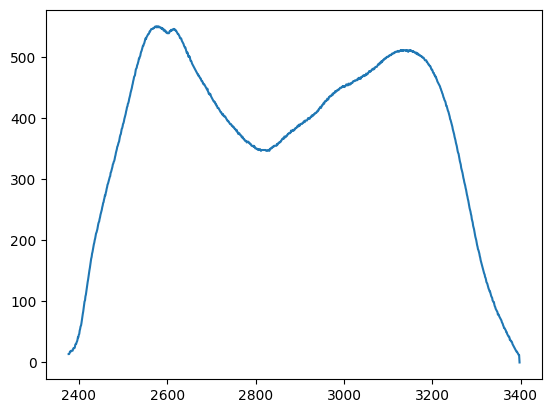

In [659]:
min_seg_idx = np.argmin([len(seg) for seg in grf_y_segs])
min_seg = grf_y_segs[min_seg_idx]
print(f"Min segment index: {min_seg_idx}")
plt.plot(min_seg)


In [660]:
n_interp_points = 100
grf_y_resampled, time_resampled = interp_segments(grf_y_segs, n_interp_points)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

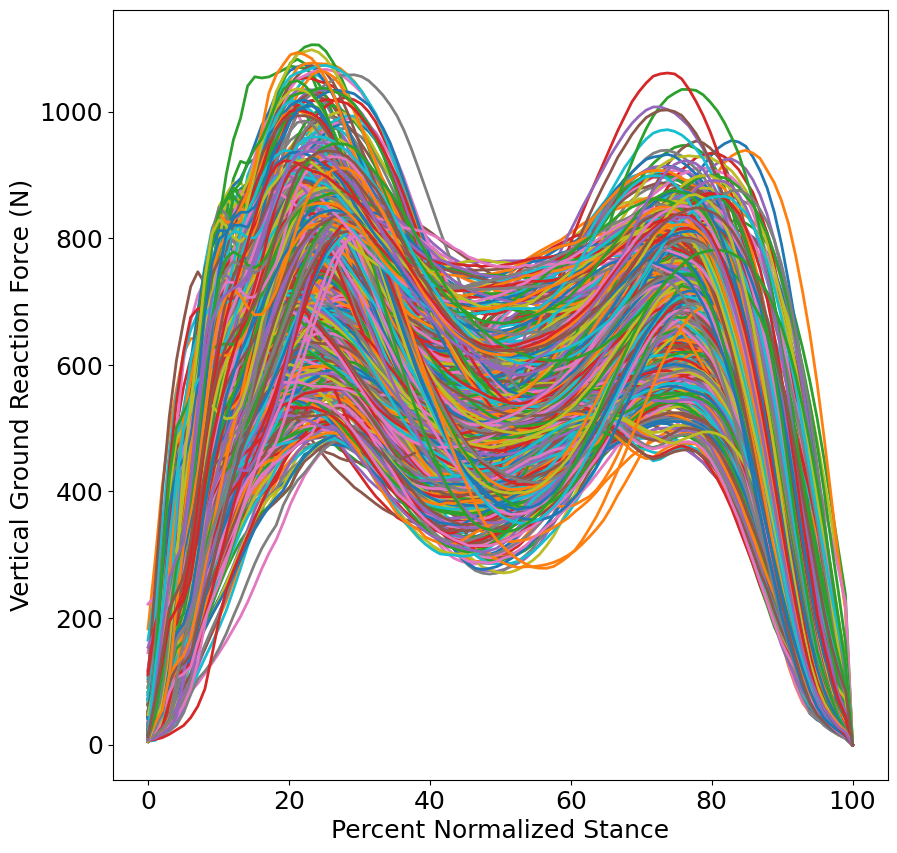

In [661]:
figure = plt.figure(figsize=(10, 10))

num_grf_segments = len(grf_y_resampled)

for i in range(num_grf_segments):
    plt.plot(time_resampled[i]*100, grf_y_resampled[i], linewidth=2)

plt.ylabel("Vertical Ground Reaction Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 1200])

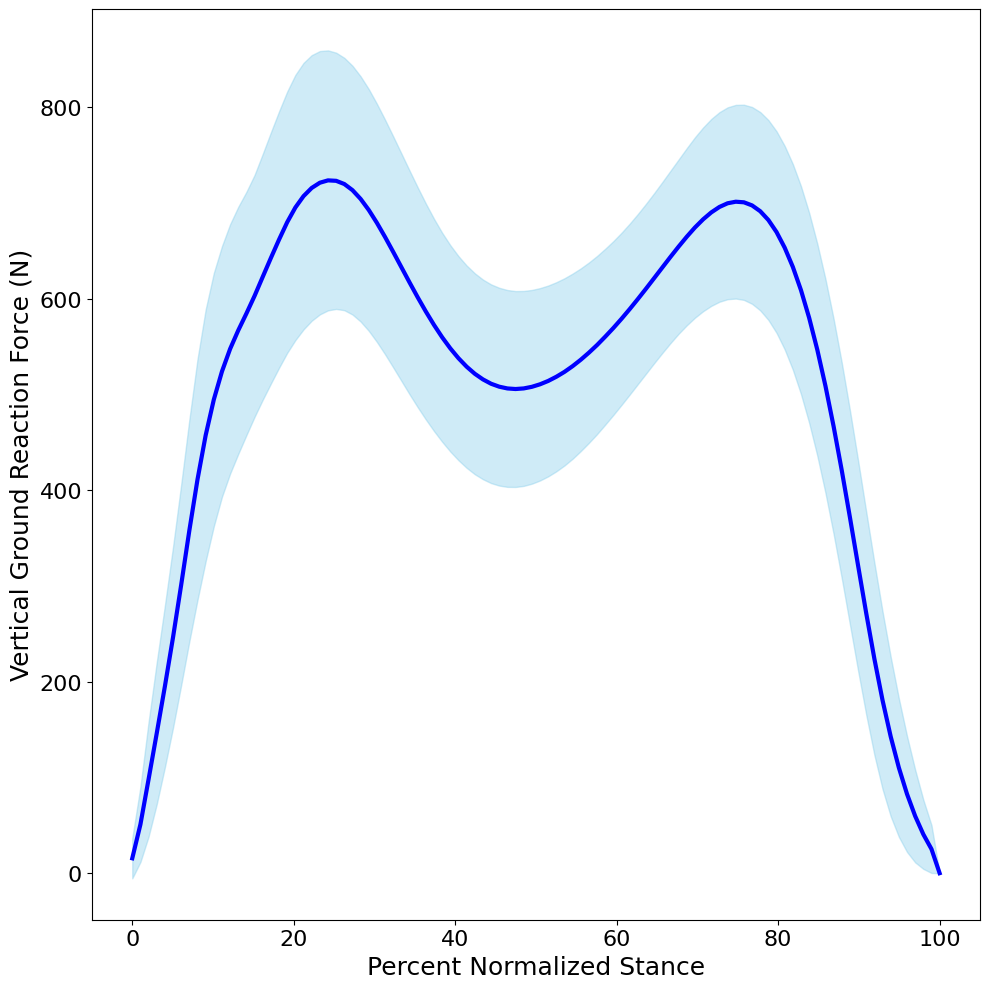

In [666]:
# Convert to array (shape: n_trials x timepoints)
grf_array = np.array(grf_y_resampled)         # shape: (N, T)
time = time_resampled[0] * 100                # assumed to be shared across all trials

# Compute mean and std
mean_grf = np.mean(grf_array, axis=0)
std_grf = np.std(grf_array, axis=0)

# Plot
plt.figure(figsize=(10, 10))

# Shaded region: mean ± 1 std
plt.fill_between(time, mean_grf - std_grf, mean_grf + std_grf,
                 color='skyblue', alpha=0.4, label='±1 SD')

# Mean curve
plt.plot(time, mean_grf, color='blue', linewidth=3, label='Mean GRF')

# Labels and styling
plt.ylabel("Vertical Ground Reaction Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.grid(True, alpha=0.3)
# plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

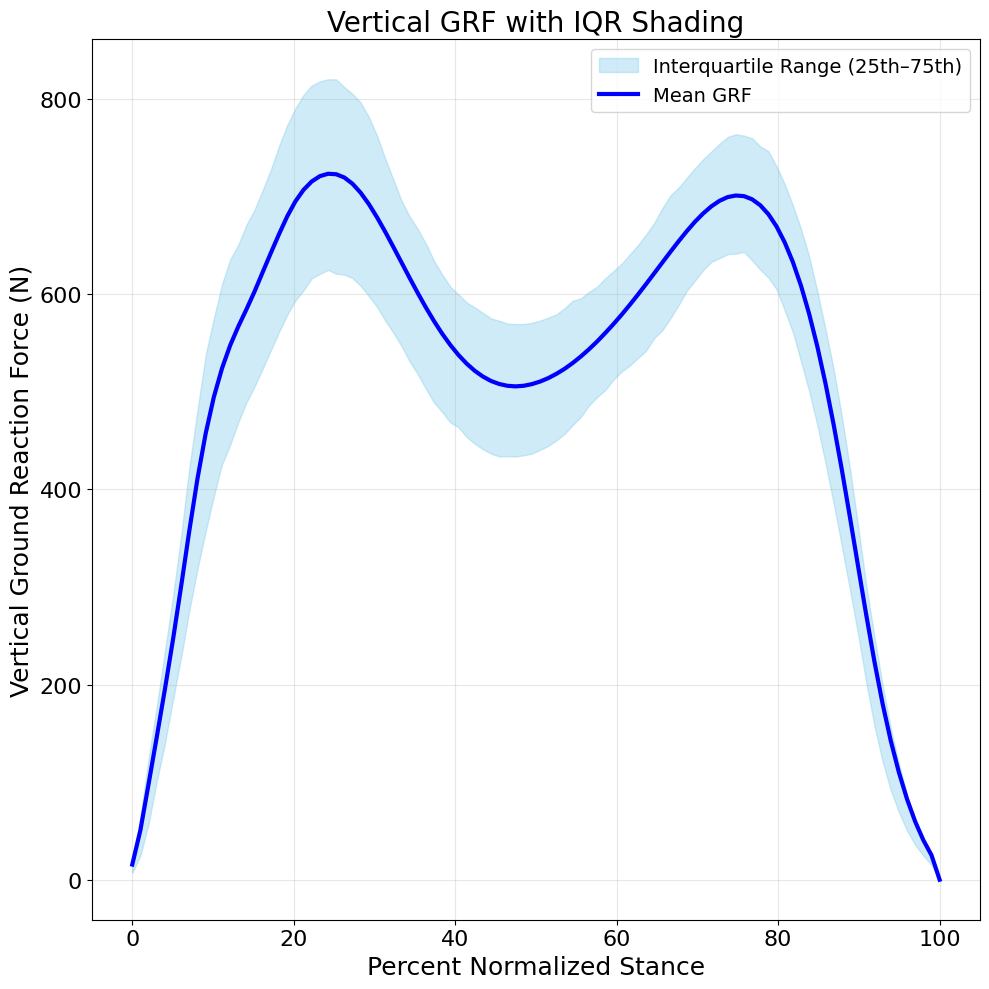

In [667]:
# Stack into array: shape (n_trials, n_timepoints)
grf_array = np.array(grf_y_resampled)
time = time_resampled[0] * 100  # Normalize to percent stance

# Compute mean and IQR
mean_grf = np.mean(grf_array, axis=0)
q1 = np.percentile(grf_array, 25, axis=0)
q3 = np.percentile(grf_array, 75, axis=0)

# Plot
plt.figure(figsize=(10, 10))

# IQR shading
plt.fill_between(time, q1, q3, color='skyblue', alpha=0.4, label='Interquartile Range (25th–75th)')

# Mean line
plt.plot(time, mean_grf, color='blue', linewidth=3, label='Mean GRF')

# Labels and formatting
plt.ylabel("Vertical Ground Reaction Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Vertical GRF with IQR Shading", fontsize=20)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [668]:
grf_x_resampled, time_resampled = interp_segments(grf_x_segs, n_interp_points)

(array([-400., -300., -200., -100.,    0.,  100.,  200.,  300.]),
 [Text(0, -400.0, '−400'),
  Text(0, -300.0, '−300'),
  Text(0, -200.0, '−200'),
  Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300')])

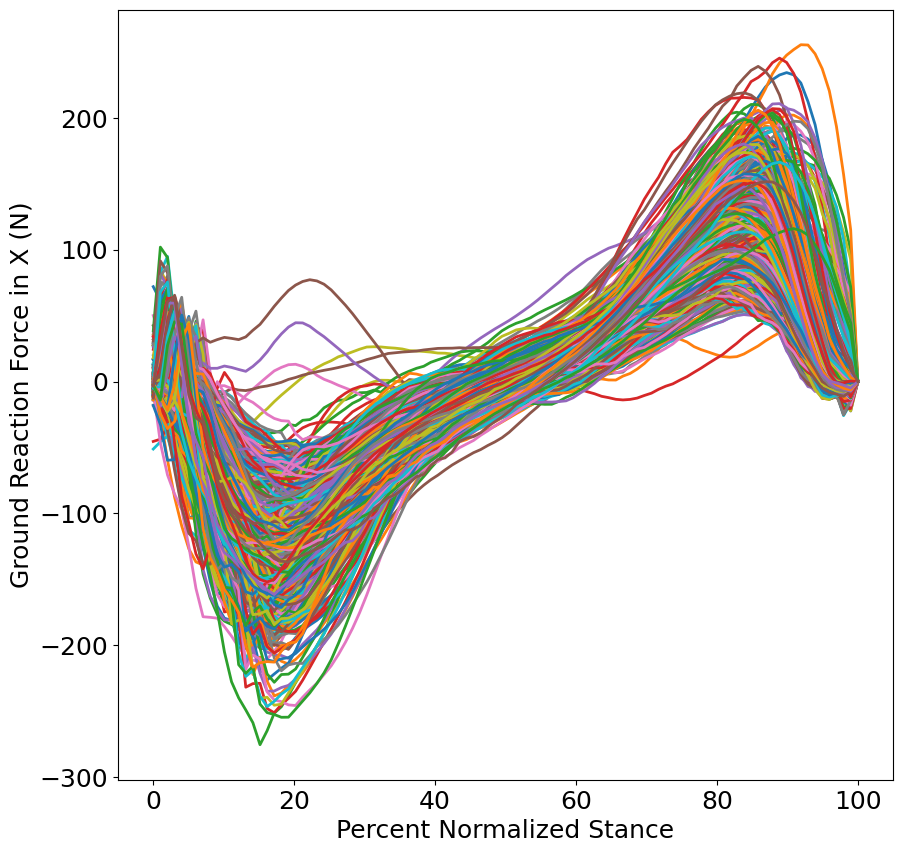

In [669]:
figure = plt.figure(figsize=(10, 10))

num_grf_segments = len(grf_x_resampled)

for i in range(num_grf_segments):
    plt.plot(time_resampled[i]*100, grf_x_resampled[i], linewidth=2)

plt.ylabel("Ground Reaction Force in X (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 1200])

In [670]:
grf_z_resampled, time_resampled = interp_segments(grf_z_segs, n_interp_points)

(array([-100.,  -75.,  -50.,  -25.,    0.,   25.,   50.,   75.,  100.,
         125.,  150.]),
 [Text(0, -100.0, '−100'),
  Text(0, -75.0, '−75'),
  Text(0, -50.0, '−50'),
  Text(0, -25.0, '−25'),
  Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150')])

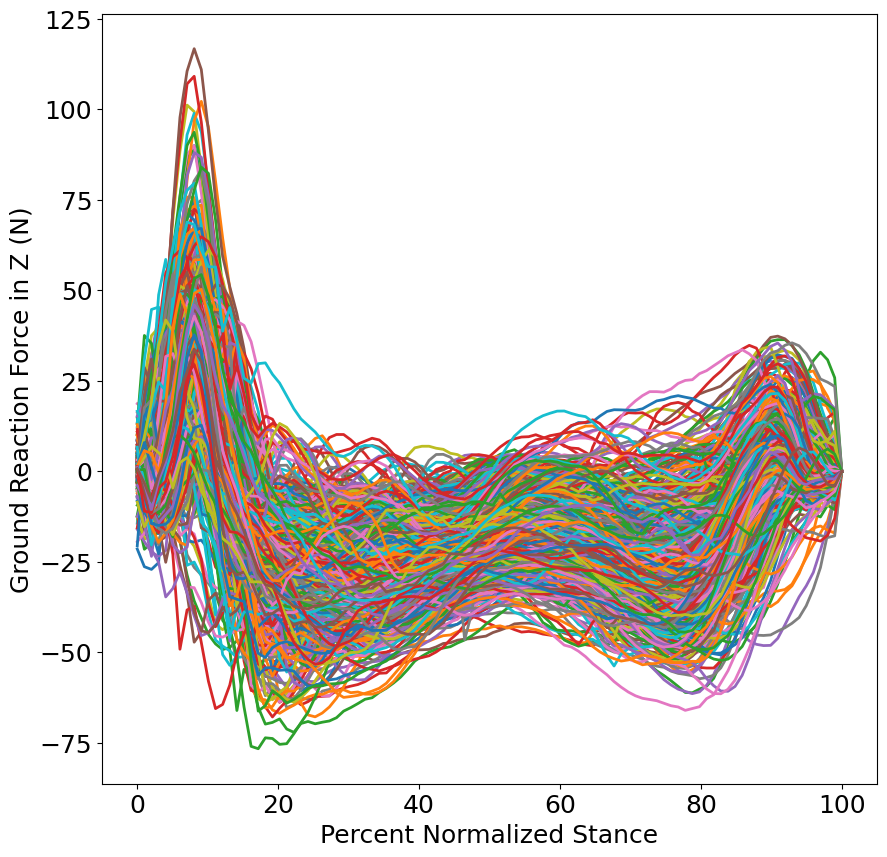

In [671]:
figure = plt.figure(figsize=(10, 10))

num_grf_segments = len(grf_z_resampled)

for i in range(num_grf_segments):
    plt.plot(time_resampled[i]*100, grf_z_resampled[i], linewidth=2)

plt.ylabel("Ground Reaction Force in Z (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 1200])

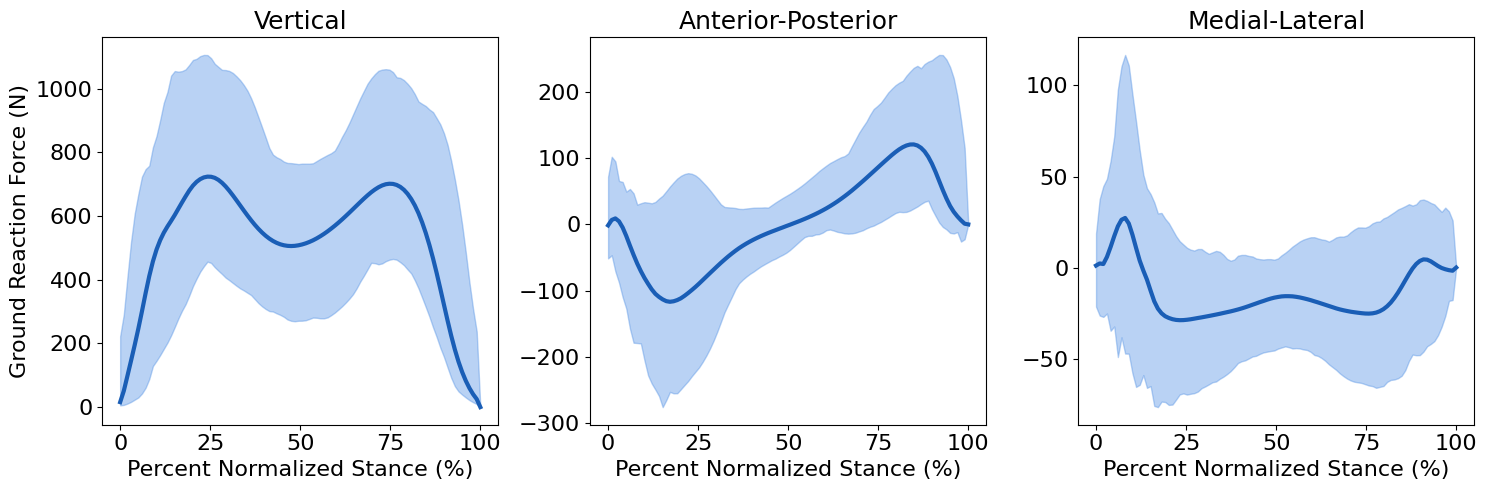

In [672]:
# Stack into arrays
grf_y = np.array(grf_y_resampled)
grf_x = np.array(grf_x_resampled)
grf_z = np.array(grf_z_resampled)
time = time_resampled[0] * 100  # percent stance

# Set up 3-column subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

# Define GRF components
components = [
    ("Vertical", grf_y),
    ("Anterior-Posterior", grf_x),
    ("Medial-Lateral", grf_z)
]

colors = {
    'fill': '#5190E4',
    'line': '#1A5EB6'
}

for ax, (label, grf_array) in zip(axes, components):
    mean_grf = np.mean(grf_array, axis=0)
    min_grf = np.min(grf_array, axis=0)
    max_grf = np.max(grf_array, axis=0)

    # Shaded area (min-max)
    ax.fill_between(time, min_grf, max_grf, color=colors['fill'], alpha=0.4, label='Min–Max Range')

    # Mean line
    ax.plot(time, mean_grf, color=colors['line'], linewidth=3, label='Mean GRF')

    ax.set_title(f"{label}", fontsize=18)
    ax.set_xlabel("Percent Normalized Stance (%)", fontsize=16)
    ax.tick_params(axis='both', labelsize=16)
    # ax.grid(True, alpha=0.3)

axes[0].set_ylabel("Ground Reaction Force (N)", fontsize=16)
# axes[0].legend(fontsize=12)

plt.tight_layout()
plt.show()

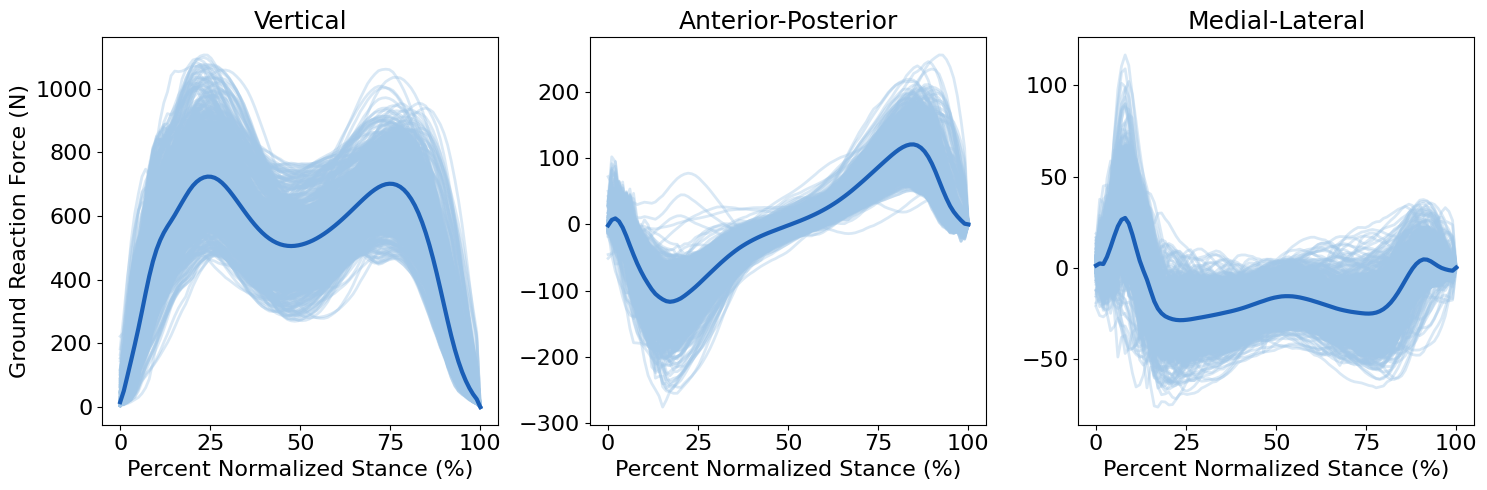

In [673]:
# Stack into arrays
grf_y = np.array(grf_y_resampled)
grf_x = np.array(grf_x_resampled)
grf_z = np.array(grf_z_resampled)
time = time_resampled[0] * 100  # percent stance

# Set up 3-column subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

# Define GRF components
components = [
    ("Vertical", grf_y),
    ("Anterior-Posterior", grf_x),
    ("Medial-Lateral", grf_z)
]

colors = {
    'fill': '#5190E4',
    'line': '#1A5EB6'
}

for ax, (label, grf_array) in zip(axes, components):
    mean_grf = np.mean(grf_array, axis=0)
    
    for i in range(num_grf_segments):
        ax.plot(time, grf_array[i], linewidth=2, color="#A2C7E7", alpha=0.4)

    # Mean line
    ax.plot(time, mean_grf, color=colors['line'], linewidth=3, label='Mean GRF')
    
    ax.set_title(f"{label}", fontsize=18)
    ax.set_xlabel("Percent Normalized Stance (%)", fontsize=16)
    ax.tick_params(axis='both', labelsize=16)
    # ax.grid(True, alpha=0.3)

axes[0].set_ylabel("Ground Reaction Force (N)", fontsize=16)
# axes[0].legend(fontsize=12)

plt.tight_layout()
plt.show()

In [674]:
tibpost_resampled, time_resampled = interp_segments(tibpost_segments, n_interp_points)
tibant_resampled, time_resampled = interp_segments(tibant_segments, n_interp_points)
edl_resampled, time_resampled = interp_segments(edl_segments, n_interp_points)
ehl_resampled, time_resampled = interp_segments(ehl_segments, n_interp_points)
fdl_resampled, time_resampled = interp_segments(fdl_segments, n_interp_points)
fhl_resampled, time_resampled = interp_segments(fhl_segments, n_interp_points)
gaslat_resampled, time_resampled = interp_segments(gaslat_segments, n_interp_points)
gasmed_resampled, time_resampled = interp_segments(gasmed_segments, n_interp_points)
soleus_resampled, time_resampled = interp_segments(soleus_segments, n_interp_points)
perbrev_resampled, time_resampled = interp_segments(perbrev_segments, n_interp_points)
perlong_resampled, time_resampled = interp_segments(perlong_segments, n_interp_points)

achilles_resampled, time_resampled = interp_segments(achilles_segments, n_interp_points)


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, -500.0, '−500'),
  Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500'),
  Text(0, 4000.0, '4000'),
  Text(0, 4500.0, '4500')])

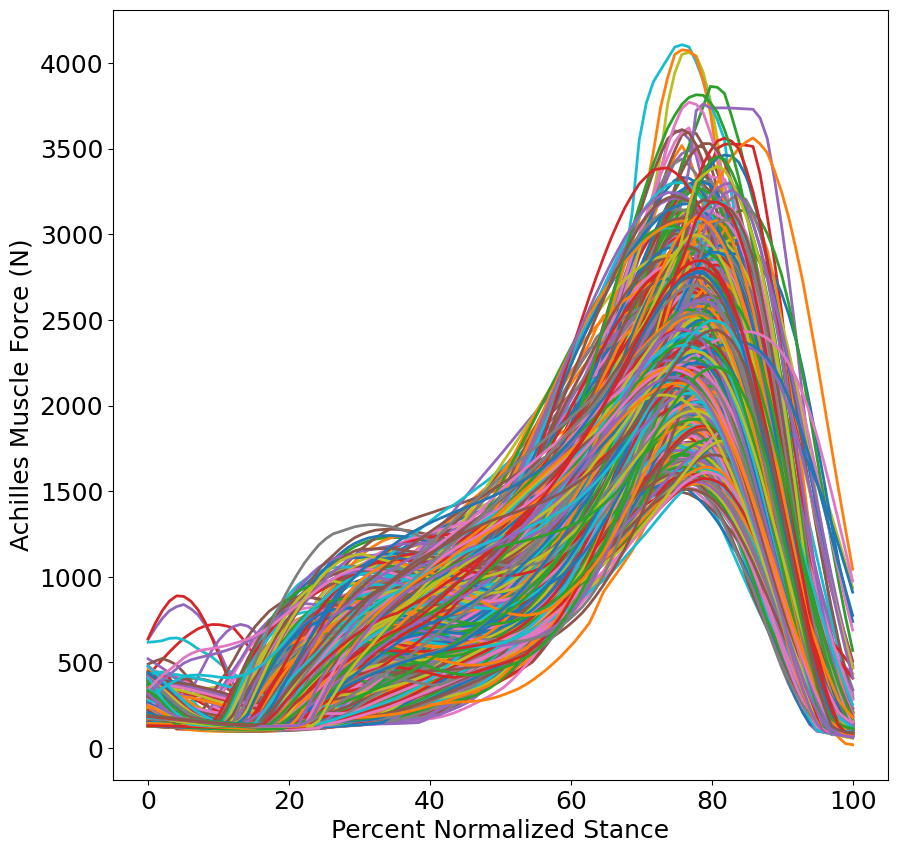

In [675]:
figure = plt.figure(figsize=(10, 10))

num_achilles_segments = len(achilles_resampled)

for i in range(num_achilles_segments):
    plt.plot(time_resampled[i]*100, achilles_resampled[i], linewidth=2)

plt.ylabel("Achilles Muscle Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 5000])

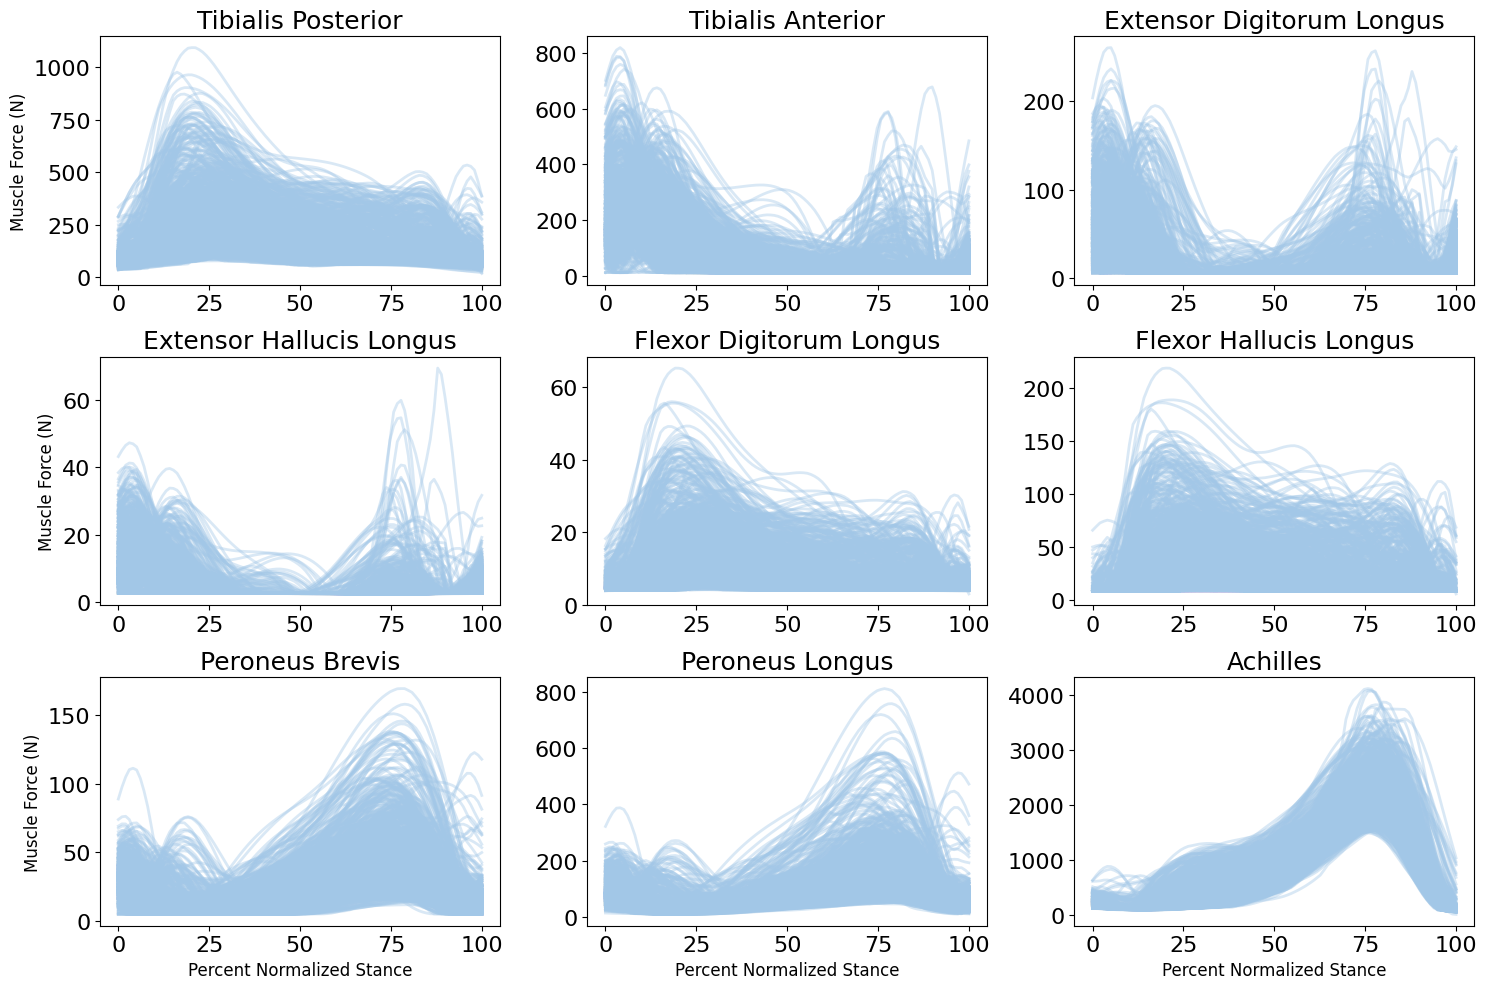

In [676]:
muscle_titles = ['Tibialis Posterior', 'Tibialis Anterior', 'Extensor Digitorum Longus', 'Extensor Hallucis Longus', 
                 'Flexor Digitorum Longus', 'Flexor Hallucis Longus', 'Peroneus Brevis', 'Peroneus Longus', 'Achilles']

perc_stance = np.linspace(0, 100, 100)

muscle_forces = [tibpost_resampled, tibant_resampled, edl_resampled, ehl_resampled, fdl_resampled, fhl_resampled,
                 perbrev_resampled, perlong_resampled, achilles_resampled]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Create subplots for 9 muscles
axes = axes.flatten()

for i, ax in enumerate(axes):
    for j in range(num_achilles_segments):
        ax.plot(time_resampled[j]*100, muscle_forces[i][j], linewidth=2, color="#A2C7E7", alpha=0.4)
    
    mean_force = ()
    
    if i >= 6:
        ax.set_xlabel('Percent Normalized Stance', fontsize=12)
        
    if i % 3 == 0:
        ax.set_ylabel('Muscle Force (N)', fontsize=12)
        
    ax.set_title(muscle_titles[i], fontsize=18)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()

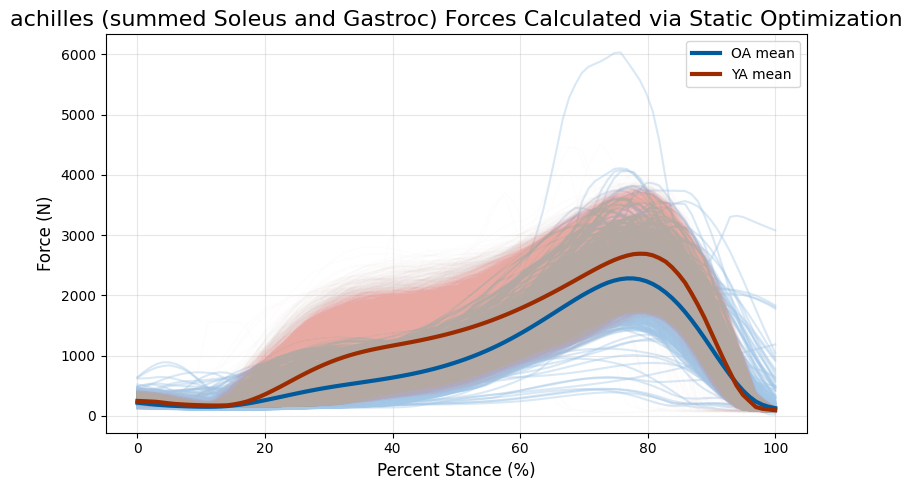

In [618]:

# --- Load Tony’s dataset ---
tony_dir = '/Users/briankeller/Desktop/GRFMuscleModel/data/'
tony_muscle_data = np.load(tony_dir + 'muscle.npy', mmap_mode='r')
n_tony_trials, n_timepoints, n_muscles = tony_muscle_data.shape

tony_muscle_labels = ['tibpost', 'tibant', 'edl', 'ehl', 'fdl', 'fhl', 'perbrev', 'perlong', 'achilles']

# --- Pick the muscle index you want to plot ---
muscle_idx = 8  # Achilles (0-based index)
muscle_name = tony_muscle_labels[muscle_idx]

# --- Create figure ---
plt.figure(figsize=(8, 5))

# --- Plot OA data (yours) ---
for j in range(num_achilles_segments):
    plt.plot(
        time_resampled[j] * 100,
        muscle_forces[muscle_idx][j],
        color="#A2C7E7",
        linewidth=1.5,
        alpha=0.4
    )

# --- Plot Tony’s data (YA) ---
for k in range(n_tony_trials):
    plt.plot(
        np.linspace(0, 100, n_timepoints),
        tony_muscle_data[k, :, muscle_idx],
        color="#E7A9A2",
        linewidth=1.0,
        alpha=0.02
    )

# --- Plot mean lines ---
oa_mean = np.mean(np.vstack(muscle_forces[muscle_idx]), axis=0)
ya_mean = np.mean(tony_muscle_data[:, :, muscle_idx], axis=0)

plt.plot(time_resampled[0] * 100, oa_mean, color="#005A9C", linewidth=3, label='OA mean')
plt.plot(np.linspace(0, 100, n_timepoints), ya_mean, color="#9C2B00", linewidth=3, label='YA mean')

# --- Labels and formatting ---
plt.title(f'{muscle_name} (summed Soleus and Gastroc) Forces Calculated via Static Optimization', fontsize=16)
plt.xlabel('Percent Stance (%)', fontsize=12)
plt.ylabel('Force (N)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_3022/346826663.py:52: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/envs/opensim_scripting/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


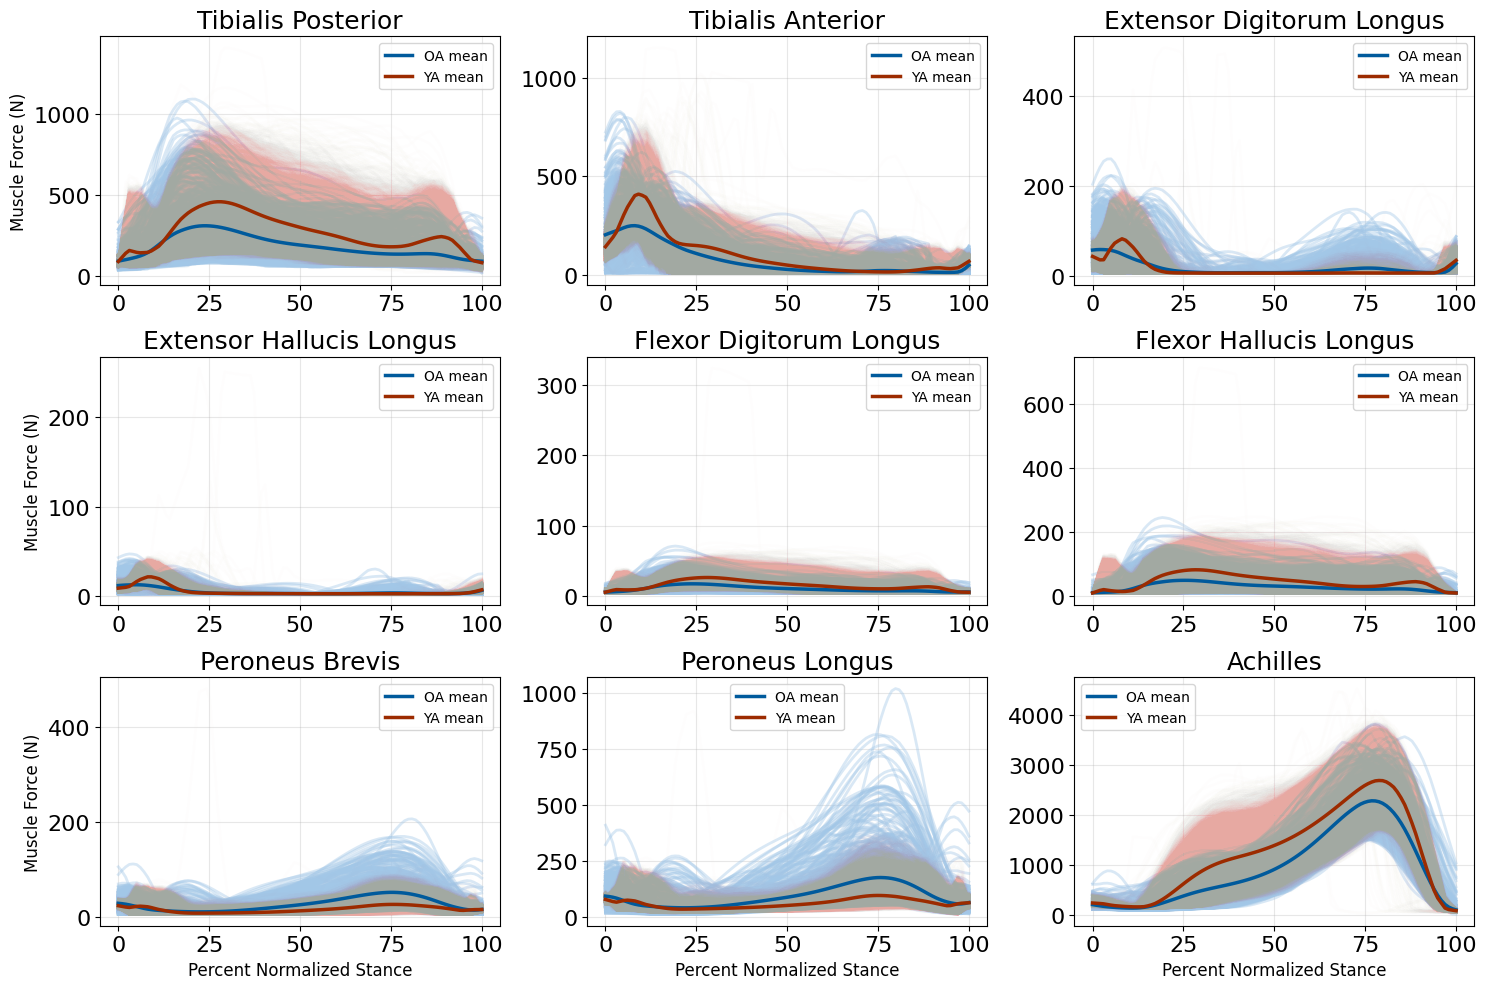

In [580]:
tony_dir = '/Users/briankeller/Desktop/GRFMuscleModel/data/'
tony_muscle_data = np.load(tony_dir + 'muscle.npy', mmap_mode='r')
n_tony_trials, n_timepoints, n_muscles = tony_muscle_data.shape
tony_muscle_labels = ['tibpost', 'tibant', 'edl', 'ehl', 'fdl', 'fhl', 'perbrev', 'perlong', 'achilles']
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Create subplots for 9 muscles
axes = axes.flatten()

for i, ax in enumerate(axes):
    for j in range(num_achilles_segments):
        ax.plot(time_resampled[j]*100, muscle_forces[i][j], linewidth=2, color="#A2C7E7", alpha=0.4)
    for k in range(n_tony_trials):
         ax.plot(np.linspace(0, 100, n_timepoints), tony_muscle_data[k, :, i], linewidth=2, color="#E7A9A2", alpha=0.01)
    your_mean = np.mean(np.vstack(muscle_forces[i]), axis=0)
    tony_mean = np.mean(tony_muscle_data[:, :, i], axis=0)

    # --- Plot mean lines ---
    ax.plot(
        time_resampled[0] * 100,
        your_mean,
        color="#005A9C",
        linewidth=2.5,
        label='OA mean'
    )
    ax.plot(
        np.linspace(0, 100, n_timepoints),
        tony_mean,
        color="#9C2B00",
        linewidth=2.5,
        label='YA mean'
    )

    # Formatting
    ax.set_title(muscle_titles[i], fontsize=14)
    if i >= 6:
        ax.set_xlabel('Percent Stance (%)', fontsize=12)
    if i % 3 == 0:
        ax.set_ylabel('Force (N)', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    ax.grid(True, alpha=0.3)
    
    if i >= 6:
        ax.set_xlabel('Percent Normalized Stance', fontsize=12)
        
    if i % 3 == 0:
        ax.set_ylabel('Muscle Force (N)', fontsize=12)
        
    ax.set_title(muscle_titles[i], fontsize=18)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.legend()

plt.tight_layout()
plt.show()

In [677]:
with open('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA_muscle_forces_stats_100.txt', "w") as file:
    for i, muscle in enumerate(muscle_titles):
        all_forces = np.concatenate(muscle_forces[i])
        # max_val = np.max(all_forces)
        # min_val = np.min(all_forces)
        max_vals = [np.max(seg) for seg in muscle_forces[i]]
        max_mean = np.mean(max_vals)
        max_std = np.std(max_vals)
        
        min_vals = [np.min(seg) for seg in muscle_forces[i]]
        min_mean = np.mean(min_vals)
        min_std = np.std(min_vals)
        
        mean_val = np.mean(all_forces)
        std_val = np.std(all_forces)
        
        print(f"{muscle}:\n Mean Max = {max_mean:.2f}\n Std Max = {max_std:.2f}\n Mean Min = {min_mean:.2f}\n Std Min = {min_std:.2f}\n Mean = {mean_val:.2f}\n Std = {std_val:.2f}\n")
        file.write(f"{muscle}:\n Mean Max = {max_mean:.2f}\n Std Max = {max_std:.2f}\n Mean Min = {min_mean:.2f}\n Std Min = {min_std:.2f}\n Mean = {mean_val:.2f}\n Std = {std_val:.2f}\n\n")

Tibialis Posterior:
 Mean Max = 344.21
 Std Max = 157.96
 Mean Min = 74.26
 Std Min = 17.95
 Mean = 182.29
 Std = 123.38

Tibialis Anterior:
 Mean Max = 330.36
 Std Max = 116.85
 Mean Min = 10.17
 Std Min = 1.27
 Mean = 81.47
 Std = 106.30

Extensor Digitorum Longus:
 Mean Max = 86.20
 Std Max = 43.90
 Mean Min = 5.47
 Std Min = 0.17
 Mean = 17.58
 Std = 27.30

Extensor Hallucis Longus:
 Mean Max = 17.71
 Std Max = 7.92
 Mean Min = 2.65
 Std Min = 0.05
 Mean = 4.98
 Std = 4.99

Flexor Digitorum Longus:
 Mean Max = 19.29
 Std Max = 9.00
 Mean Min = 4.62
 Std Min = 0.96
 Mean = 10.24
 Std = 6.85

Flexor Hallucis Longus:
 Mean Max = 59.42
 Std Max = 34.29
 Mean Min = 8.59
 Std Min = 0.23
 Mean = 26.79
 Std = 26.63

Peroneus Brevis:
 Mean Max = 57.67
 Std Max = 24.51
 Mean Min = 7.32
 Std Min = 3.14
 Mean = 25.90
 Std = 20.84

Peroneus Longus:
 Mean Max = 200.47
 Std Max = 106.71
 Mean Min = 29.30
 Std Min = 11.58
 Mean = 89.74
 Std = 74.72

Achilles:
 Mean Max = 2346.51
 Std Max = 464.09


In [678]:
with open('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA_muscle_forces_stats_25.txt', "w") as file:
    for i, muscle in enumerate(muscle_titles):
        all_forces = np.concatenate(muscle_forces[i])
        # max_val = np.max(all_forces)
        # min_val = np.min(all_forces)
        max_vals = [np.max(seg) for seg in muscle_forces[i]]
        max_mean = np.mean(max_vals) / 4
        max_std = np.std(max_vals) / 4
        
        min_vals = [np.min(seg) for seg in muscle_forces[i]]
        min_mean = np.mean(min_vals) / 4
        min_std = np.std(min_vals) / 4
        
        mean_val = np.mean(all_forces) / 4
        std_val = np.std(all_forces) / 4
        
        print(f"{muscle}:\n Mean Max = {max_mean:.2f}\n Std Max = {max_std:.2f}\n Mean Min = {min_mean:.2f}\n Std Min = {min_std:.2f}\n Mean = {mean_val:.2f}\n Std = {std_val:.2f}\n")
        file.write(f"{muscle}:\n Mean Max = {max_mean:.2f}\n Std Max = {max_std:.2f}\n Mean Min = {min_mean:.2f}\n Std Min = {min_std:.2f}\n Mean = {mean_val:.2f}\n Std = {std_val:.2f}\n\n")

Tibialis Posterior:
 Mean Max = 86.05
 Std Max = 39.49
 Mean Min = 18.56
 Std Min = 4.49
 Mean = 45.57
 Std = 30.84

Tibialis Anterior:
 Mean Max = 82.59
 Std Max = 29.21
 Mean Min = 2.54
 Std Min = 0.32
 Mean = 20.37
 Std = 26.57

Extensor Digitorum Longus:
 Mean Max = 21.55
 Std Max = 10.97
 Mean Min = 1.37
 Std Min = 0.04
 Mean = 4.39
 Std = 6.83

Extensor Hallucis Longus:
 Mean Max = 4.43
 Std Max = 1.98
 Mean Min = 0.66
 Std Min = 0.01
 Mean = 1.24
 Std = 1.25

Flexor Digitorum Longus:
 Mean Max = 4.82
 Std Max = 2.25
 Mean Min = 1.15
 Std Min = 0.24
 Mean = 2.56
 Std = 1.71

Flexor Hallucis Longus:
 Mean Max = 14.86
 Std Max = 8.57
 Mean Min = 2.15
 Std Min = 0.06
 Mean = 6.70
 Std = 6.66

Peroneus Brevis:
 Mean Max = 14.42
 Std Max = 6.13
 Mean Min = 1.83
 Std Min = 0.78
 Mean = 6.47
 Std = 5.21

Peroneus Longus:
 Mean Max = 50.12
 Std Max = 26.68
 Mean Min = 7.32
 Std Min = 2.89
 Mean = 22.43
 Std = 18.68

Achilles:
 Mean Max = 586.63
 Std Max = 116.02
 Mean Min = 23.50
 Std Mi

In [679]:
grf = np.stack((grf_x_resampled, grf_y_resampled, grf_z_resampled), axis=-1)
grf.shape

(766, 100, 3)

In [680]:
np.save('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA_no_missteps_grf', grf)

In [681]:
grf_flattened = np.hstack((grf_x_resampled, grf_y_resampled, grf_z_resampled))
grf_flattened.shape

(766, 300)

In [682]:
np.save('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA_no_missteps_grf_flattened', grf_flattened)

In [683]:
muscle = np.stack((tibpost_resampled, tibant_resampled, edl_resampled, ehl_resampled, fdl_resampled, fhl_resampled, perbrev_resampled, perlong_resampled, achilles_resampled), axis=-1)
muscle.shape

(766, 100, 9)

In [684]:
np.save('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA_no_missteps_muscle', muscle)

In [685]:
muscle_flattened = np.hstack((tibpost_resampled, tibant_resampled, edl_resampled, ehl_resampled, fdl_resampled, fhl_resampled, perbrev_resampled, perlong_resampled, achilles_resampled))
muscle_flattened.shape

(766, 900)

In [686]:
np.save('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA_no_missteps_muscle_flattened', muscle_flattened)